In [3]:
words = open('activeTrainingMaterial.txt', 'r').read().split()
words[:10]

['A',
 'Painted',
 'Christmas',
 'An',
 'original',
 'story',
 'of',
 'life,',
 'potential,',
 'wonder,']

In [4]:
words = [word.lower() for word in words]
len(words)

9015

In [7]:
min(len(w) for w in words)

1

In [8]:
max(len(w) for w in words)

18

In [5]:
b = {}
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1
        #print(ch1, ch2)
        

In [6]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('e', '.'), 1526),
 (('.', 't'), 1467),
 (('t', 'h'), 1218),
 (('t', '.'), 963),
 (('.', 'i'), 933),
 (('.', 'a'), 931),
 (('s', '.'), 931),
 (('d', '.'), 925),
 (('h', 'e'), 793),
 ((',', '.'), 751),
 (('i', 'n'), 717),
 (('.', 'w'), 696),
 (('.', 's'), 650),
 (('r', 'e'), 631),
 (('e', 'r'), 538),
 (('a', 'n'), 522),
 (('.', '.'), 519),
 (('n', '.'), 487),
 (('.', 'm'), 480),
 (('e', 'd'), 452),
 (('o', 'u'), 451),
 (('y', '.'), 436),
 (('o', '.'), 436),
 (('i', '.'), 425),
 (('a', 's'), 392),
 (('o', 'n'), 387),
 (('r', '.'), 382),
 (('.', 'c'), 381),
 (('n', 'd'), 381),
 (('.', 'o'), 379),
 (('h', 'a'), 377),
 (('t', 'o'), 371),
 (('e', 'n'), 368),
 (('a', 'r'), 368),
 (('n', 'g'), 355),
 (('.', 'b'), 355),
 (('s', 'e'), 353),
 (('i', 's'), 350),
 (('v', 'e'), 350),
 (('a', 't'), 348),
 (('s', 't'), 347),
 (('e', 'a'), 344),
 (('.', 'f'), 329),
 (('m', 'e'), 329),
 (('i', 't'), 323),
 (('o', 'r'), 320),
 (('a', 'l'), 317),
 (('h', 'i'), 311),
 (('.', 'h'), 290),
 (('n', 't'), 282

In [9]:
import torch

In [10]:
N = torch.zeros((51+1+1, 51+1+1), dtype=torch.int32)

In [11]:
N.size()

torch.Size([53, 53])

In [12]:
len(''.join(words)) + 2

40753

In [13]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i for i,s in enumerate(chars)}
z = len(chars)
i = stoi['.']
i2 = stoi['!']
stoi['!'] = i
stoi['.'] = i2
z

51

In [14]:
stoi.items()

dict_items([('!', 8), ('"', 1), ("'", 2), ('(', 3), (')', 4), ('*', 5), (',', 6), ('-', 7), ('.', 0), ('0', 9), ('1', 10), ('2', 11), ('3', 12), ('4', 13), ('5', 14), ('6', 15), ('7', 16), ('8', 17), (':', 18), (';', 19), ('?', 20), ('_', 21), ('a', 22), ('b', 23), ('c', 24), ('d', 25), ('e', 26), ('f', 27), ('g', 28), ('h', 29), ('i', 30), ('j', 31), ('k', 32), ('l', 33), ('m', 34), ('n', 35), ('o', 36), ('p', 37), ('q', 38), ('r', 39), ('s', 40), ('t', 41), ('u', 42), ('v', 43), ('w', 44), ('x', 45), ('y', 46), ('z', 47), ('‘', 48), ('’', 49), ('…', 50)])

In [15]:

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1
        #print(ch1, ch2)

In [16]:
itos = {i:s for s,i in stoi.items()}

stoi['i']
itos[30]

'i'

#### import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=[16,16])
plt.imshow(N, cmap='Blues')
for i in range(40753):
    for j in range(40753):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="bottom", color='gray')
plt.axis('off');

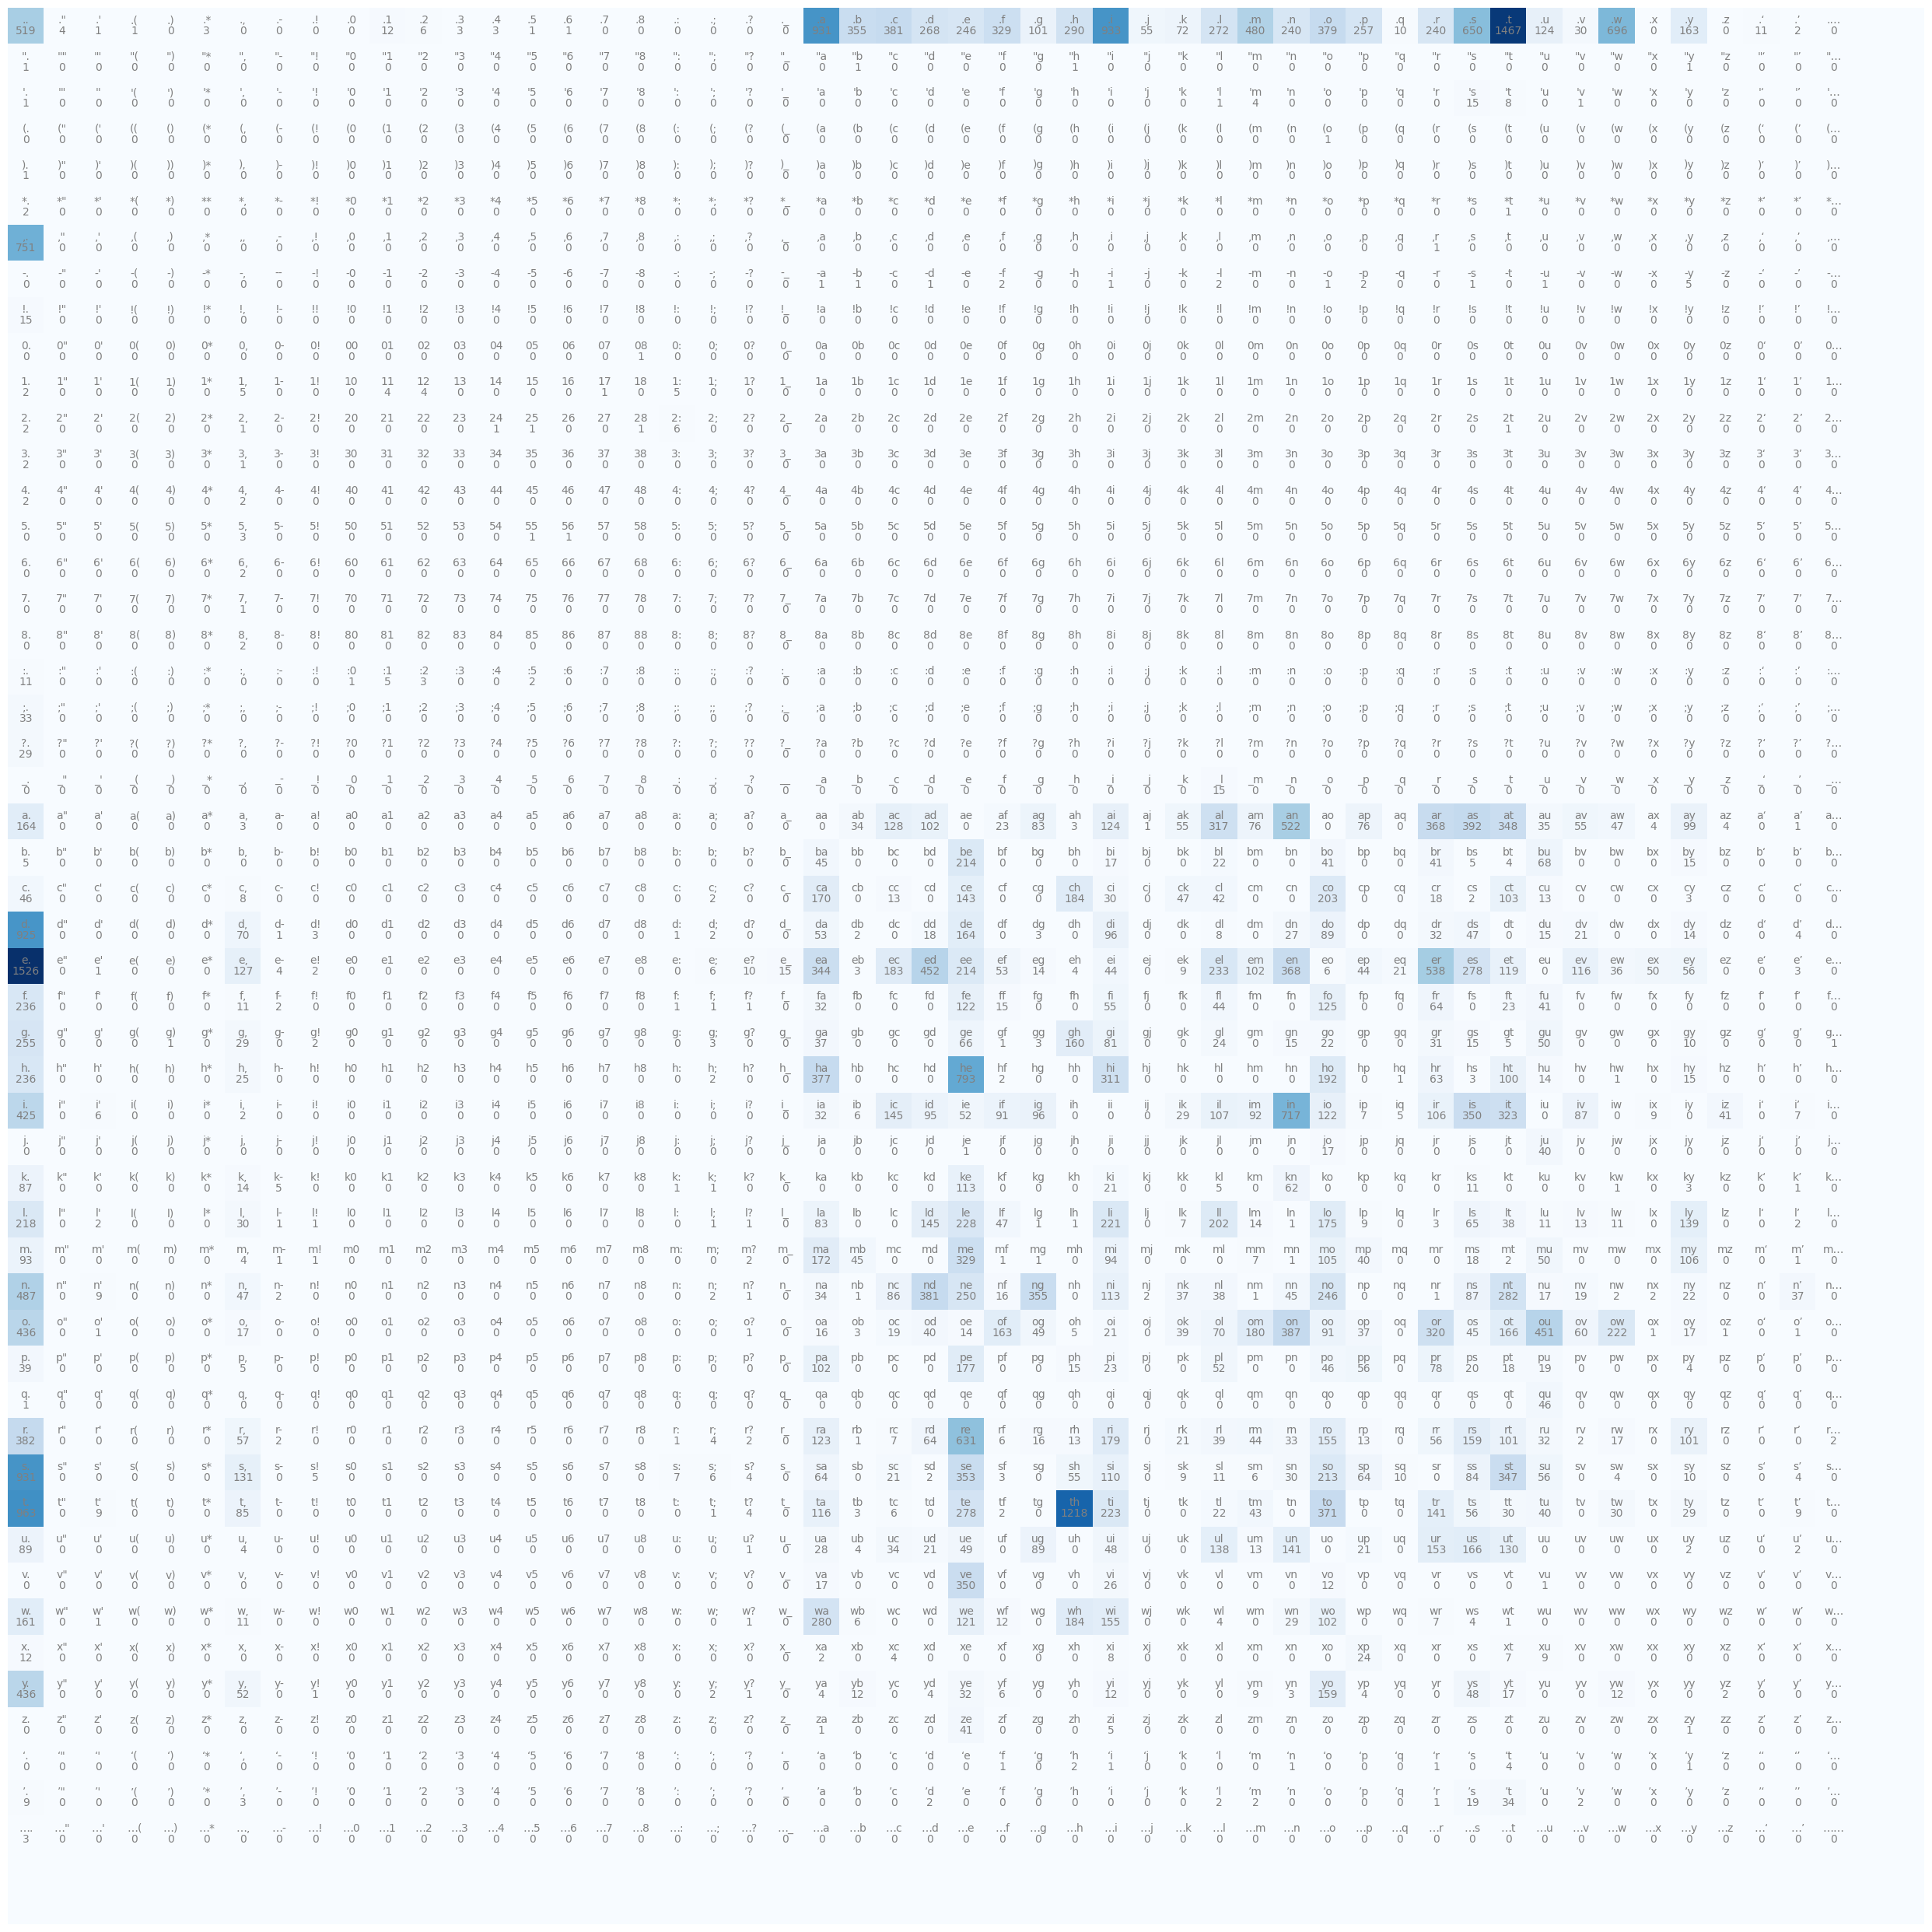

In [46]:

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=[32,32]) 
plt.imshow(N, cmap='Blues') 
for i in range(51): 
    for j in range(51): 
        chstr = itos[i] + itos[j] 
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray') 
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray') 
plt.axis('off');

In [17]:
N[0, :]

tensor([ 519,    4,    1,    1,    0,    3,    0,    0,    0,    0,   12,    6,
           3,    3,    1,    1,    0,    0,    0,    0,    0,    0,  931,  355,
         381,  268,  246,  329,  101,  290,  933,   55,   72,  272,  480,  240,
         379,  257,   10,  240,  650, 1467,  124,   30,  696,    0,  163,    0,
          11,    2,    0,    0,    0], dtype=torch.int32)

In [18]:
p = N[0].float()
p = p / p.sum()
p

tensor([5.4425e-02, 4.1946e-04, 1.0487e-04, 1.0487e-04, 0.0000e+00, 3.1460e-04,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.2584e-03, 6.2919e-04,
        3.1460e-04, 3.1460e-04, 1.0487e-04, 1.0487e-04, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 9.7630e-02, 3.7227e-02,
        3.9954e-02, 2.8104e-02, 2.5797e-02, 3.4501e-02, 1.0591e-02, 3.0411e-02,
        9.7840e-02, 5.7676e-03, 7.5503e-03, 2.8523e-02, 5.0336e-02, 2.5168e-02,
        3.9744e-02, 2.6951e-02, 1.0487e-03, 2.5168e-02, 6.8163e-02, 1.5384e-01,
        1.3003e-02, 3.1460e-03, 7.2987e-02, 0.0000e+00, 1.7093e-02, 0.0000e+00,
        1.1535e-03, 2.0973e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00])

In [20]:
p = torch.rand(3)
p = p / p.sum()
p

tensor([0.1770, 0.4501, 0.3728])

In [21]:
idx = torch.multinomial(p, num_samples=1, replacement=True).item()
itos[idx]

'"'

In [22]:
p.shape

torch.Size([3])

In [23]:
P = N.float()
P /= P.sum(1, keepdim=True)

In [24]:
for i in range(20):
    ix = 0
    out = []
    while True:
        #p = N[ix].float()
        #p = p / p.sum()
        ##p = torch.ones(51)  / 51.0
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True).item()
        out.append(itos[ix])
        if ix == 0:
            break
    #print(''.join(out) + '.')    
    print(''.join(out), end=' ', flush=True)


coupe,. fur. agal. wa. wineasthed. lshe. y,. s. wh. that. o. an. covesoff. es. pand. bavi. had. w. noru. fofomendse,. 

In [70]:
log_likelihood = 0.0
n = 0

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n+=1
        print(f'{ch1}{ch2}: {prob: .4f} {logprob: .4f}')
    nx+=1
print(f'{log_likelihood}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')


.a:  0.0976 -2.3266
a.:  0.0535 -2.9276
.p:  0.0270 -3.6138
pa:  0.1560 -1.8581
ai:  0.0405 -3.2072
in:  0.2429 -1.4152
nt:  0.1076 -2.2298
te:  0.0756 -2.5828
ed:  0.0907 -2.3997
d.:  0.5799 -0.5448
.c:  0.0400 -3.2200
ch:  0.1792 -1.7195
hr:  0.0295 -3.5231
ri:  0.0791 -2.5371
is:  0.1186 -2.1323
st:  0.1366 -1.9906
tm:  0.0117 -4.4492
ma:  0.1603 -1.8307
as:  0.1279 -2.0562
s.:  0.3665 -1.0037
.a:  0.0976 -2.3266
an:  0.1704 -1.7698
n.:  0.1857 -1.6834
.o:  0.0397 -3.2253
or:  0.1114 -2.1948
ri:  0.0791 -2.5371
ig:  0.0325 -3.4259
gi:  0.0999 -2.3038
in:  0.2429 -1.4152
na:  0.0130 -4.3453
al:  0.1035 -2.2686
l.:  0.1305 -2.0361
.s:  0.0682 -2.6859
st:  0.1366 -1.9906
to:  0.1008 -2.2942
or:  0.1114 -2.1948
ry:  0.0446 -3.1093
y.:  0.5343 -0.6268
.o:  0.0397 -3.2253
of:  0.0567 -2.8694
f.:  0.3053 -1.1864
.l:  0.0285 -3.5570
li:  0.1323 -2.0224
if:  0.0308 -3.4794
fe:  0.1578 -1.8463
e,:  0.0255 -3.6692
,.:  0.9987 -0.0013
.p:  0.0270 -3.6138
po:  0.0703 -2.6545
ot:  0.0578 -2.8511


In [291]:
# GOAL: maximize likelihood of data with regard to model params
# equv to maximizing the log_liklihood
# equv to minimiazing the negative log likehood
#equv to minimiazing the averager neg log likelihood

In [77]:
#create bigram training set (x,y)
xs, ys =[], []
nx = 0

for w in words[:2]:
    if (nx==0):
        nx+=1
        continue
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)


. p
p a
a i
i n
n t
t e
e d
d .


In [78]:
xs

tensor([ 0, 37, 22, 30, 35, 41, 26, 25])

In [79]:
ys

tensor([37, 22, 30, 35, 41, 26, 25,  0])

In [80]:
import torch.nn.functional as F

xenc = F.one_hot(xs, num_classes=51).float() #prepare // input layer to neuralnet
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [84]:
xenc.shape

torch.Size([8, 51])

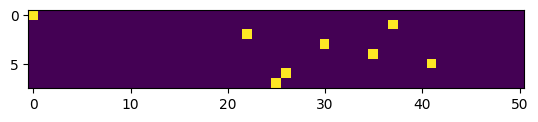

In [83]:
plt.imshow(xenc)

In [110]:
xenc.dtype

torch.float32

In [111]:
#create a neuralnet structure of 51 neurons of the 51 characters
W = torch.randn([51, 51])
xenc @ W

tensor([[-9.4513e-01,  1.0005e+00, -1.0121e-01,  1.5834e+00, -5.0699e-01,
          9.3785e-01, -1.7164e+00, -2.1493e-01,  3.1855e-01, -1.9031e+00,
         -2.9997e-01,  4.3297e-02,  1.9653e+00, -1.1607e+00,  1.5456e+00,
         -5.0449e-01,  1.3788e-02, -1.4515e-01, -9.8031e-01, -6.4236e-01,
         -1.3890e+00, -1.0644e+00, -1.3310e-02,  1.0701e+00,  6.8747e-01,
          2.0512e+00,  3.9339e-01, -2.0470e+00,  1.1242e+00,  3.9845e-01,
         -9.6443e-01,  7.6855e-01, -8.5221e-01,  7.3079e-02,  2.6925e-01,
         -8.3714e-01, -6.1604e-01, -3.2550e-01,  1.4316e+00, -6.4310e-01,
         -1.9899e-02, -2.1651e-01,  5.6467e-01, -7.2995e-01, -1.6236e+00,
          2.7085e-01, -5.3213e-01, -1.6376e-01,  3.1970e+00, -1.0968e+00,
          7.2307e-01],
        [-7.0836e-01,  2.2022e-01, -7.5566e-01, -6.3153e-01,  1.0323e+00,
          4.9455e-01, -7.1980e-01, -8.5880e-01,  1.4189e+00,  2.1026e-01,
         -6.8584e-01,  3.3748e-01, -8.1422e-02, -2.5337e+00,  1.5186e+00,
          2.472

In [91]:
(xenc @ W).shape
(xenc @ W) [3, 13]

tensor(1.5031)

In [92]:
xenc[3]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [94]:
W[:, 13]

tensor([-0.5582, -0.5825,  0.0937, -0.2406,  0.5054,  0.0604,  0.5169, -1.9279,
        -1.3545, -0.1209,  0.5036,  0.0364, -0.0525,  0.0802,  0.3471,  0.0183,
        -0.4085,  1.3966, -0.6734,  0.8581,  0.1943, -1.3714,  0.8430, -0.9864,
        -0.1262,  0.9008, -1.0132, -1.2849,  0.2116, -0.0710,  1.5031, -0.9639,
         2.0684, -0.7824, -0.2495, -1.1119, -0.2304, -0.7096, -0.9699, -1.6694,
        -1.0290, -0.2213, -0.4101, -0.6397,  1.0488,  0.5776,  1.1879, -1.0137,
         2.1786, -1.8002,  0.0900])

In [99]:
xa = (xenc[3] * W[:, 13]).sum()
xb = (xenc @ W) [3, 13]
xa

tensor(1.5031)

In [100]:
xb

tensor(1.5031)

In [103]:

xa==xb

tensor(True)

In [104]:
(xenc @ W)

tensor([[-6.6390e-01,  1.1891e+00, -9.1714e-01,  5.3740e-01, -2.5593e+00,
          1.0126e+00,  1.0113e+00,  1.8605e+00,  1.2713e+00, -7.5489e-02,
         -1.6747e+00,  1.1932e+00,  9.8009e-01, -5.5815e-01, -1.5112e-01,
          4.6655e-01, -4.3613e-01,  3.1869e-01,  8.0270e-02, -1.5116e+00,
         -2.3670e-01, -7.8001e-01, -9.1553e-01,  8.2578e-01,  4.1055e-01,
         -7.3197e-02,  5.9775e-01, -9.9656e-01,  1.6804e-01,  2.5086e-01,
          4.1571e-01, -4.8557e-01, -1.2483e-01, -4.4729e-01, -4.0885e-02,
         -1.1445e+00,  1.2338e+00,  8.9904e-01, -7.8702e-01,  1.1485e+00,
          2.1611e+00, -4.6613e-01,  1.8038e+00,  7.5646e-01, -3.0826e+00,
         -9.7244e-01, -1.3506e+00, -1.1689e-01,  2.0984e-01,  1.7041e+00,
          1.5613e-01],
        [ 1.2230e+00, -1.6857e+00, -1.3786e+00,  1.4409e+00, -7.5192e-01,
          4.4977e-02,  9.7625e-01,  6.5577e-01,  1.2461e+00, -1.0088e+00,
         -2.3774e+00, -1.0487e-01,  1.1840e-01, -7.0956e-01, -2.3432e-01,
          2.353

In [106]:
(xenc @ W).exp()

tensor([[ 0.5148,  3.2843,  0.3997,  1.7115,  0.0774,  2.7527,  2.7491,  6.4268,
          3.5654,  0.9273,  0.1874,  3.2975,  2.6647,  0.5723,  0.8597,  1.5945,
          0.6465,  1.3753,  1.0836,  0.2206,  0.7892,  0.4584,  0.4003,  2.2837,
          1.5077,  0.9294,  1.8180,  0.3691,  1.1830,  1.2851,  1.5154,  0.6153,
          0.8826,  0.6394,  0.9599,  0.3184,  3.4344,  2.4572,  0.4552,  3.1536,
          8.6806,  0.6274,  6.0725,  2.1307,  0.0458,  0.3782,  0.2591,  0.8897,
          1.2335,  5.4964,  1.1690],
        [ 3.3974,  0.1853,  0.2519,  4.2244,  0.4715,  1.0460,  2.6545,  1.9266,
          3.4767,  0.3647,  0.0928,  0.9004,  1.1257,  0.4919,  0.7911,  1.2654,
          5.0623,  0.7186,  6.3581,  4.9712,  1.7469,  0.6809,  0.1472,  1.4273,
          0.2577,  0.3672,  3.0803,  3.6178,  0.5777,  1.4178,  0.8008,  5.9219,
          0.1134,  0.6930,  2.9670, 10.0510,  2.7820,  0.2512,  1.8690,  2.6817,
          0.4661,  0.4902,  1.2582,  2.0455,  0.6218,  0.9087,  0.1425, 

In [113]:
#forward pass through neuralnet

logits = xenc @ W #log-counts
counts = logits.exp() #equivalent

#these next 2 lines are a softmax, which outputs a prob dis (sumsto1, 0 to 1) , normalized
probs = counts / counts.sum(1,keepdims=True)
probs

tensor([[0.0040, 0.0278, 0.0092, 0.0498, 0.0062, 0.0261, 0.0018, 0.0082, 0.0140,
         0.0015, 0.0076, 0.0107, 0.0729, 0.0032, 0.0479, 0.0062, 0.0104, 0.0088,
         0.0038, 0.0054, 0.0025, 0.0035, 0.0101, 0.0298, 0.0203, 0.0795, 0.0151,
         0.0013, 0.0314, 0.0152, 0.0039, 0.0220, 0.0044, 0.0110, 0.0134, 0.0044,
         0.0055, 0.0074, 0.0428, 0.0054, 0.0100, 0.0082, 0.0180, 0.0049, 0.0020,
         0.0134, 0.0060, 0.0087, 0.2499, 0.0034, 0.0211],
        [0.0047, 0.0118, 0.0044, 0.0050, 0.0265, 0.0155, 0.0046, 0.0040, 0.0390,
         0.0117, 0.0048, 0.0132, 0.0087, 0.0007, 0.0431, 0.0121, 0.0047, 0.0383,
         0.1567, 0.0031, 0.0087, 0.0085, 0.0038, 0.0150, 0.0060, 0.0057, 0.0595,
         0.0194, 0.0045, 0.0581, 0.0181, 0.0028, 0.0119, 0.0023, 0.0529, 0.0125,
         0.0038, 0.0127, 0.0048, 0.0296, 0.0046, 0.0056, 0.0820, 0.0124, 0.0073,
         0.0235, 0.0138, 0.0310, 0.0275, 0.0023, 0.0369],
        [0.0061, 0.0043, 0.0087, 0.0038, 0.0074, 0.0045, 0.0101, 0.0043, 0

In [225]:
nlls = torch.zeros(5)
for i in range(5):
    #ith bigram
    x = xs[i].item() #inputcharindex
    y = ys[i].item() #labelcharindex
    print('~')
    print(f'Bigram Example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
    print('input to neural net')
    print('output prob from net:', probs[i])
    print('label, not actual char:', y)
    p = probs[i, y]
    print('prob assigned by net to the correct character: ', p.item())
    logp = torch.log(p)
    print('log likelihood:', logp.item())
    nll = -logp
    print('negitive log likelihood: ', nll.item())
    nlls[i] = nll

print('==')
print('Average Negative Log Likelihood, i.e. loss =', nll.mean().item())

~
Bigram Example 1: .p (indexes 0,37)
input to neural net
output prob from net: tensor([1.5236e-03, 1.0145e-03, 6.8594e-03, 3.8065e-03, 1.7694e-03, 2.9333e-03,
        9.2440e-03, 4.3859e-04, 3.7172e-03, 8.2189e-03, 4.3926e-03, 2.1501e-04,
        3.5404e-03, 7.0657e-04, 4.1662e-03, 3.3977e-03, 3.8767e-04, 3.1590e-03,
        1.1746e-02, 1.3218e-03, 4.1831e-03, 7.6261e-04, 4.0723e-03, 1.8841e-03,
        1.2513e-03, 3.5835e-03, 3.6987e-03, 5.3167e-03, 2.4431e-04, 7.3288e-03,
        6.1309e-03, 7.0338e-04, 3.0562e-03, 5.3376e-04, 1.2255e-02, 4.4873e-03,
        5.2024e-03, 8.3350e-01, 3.5046e-03, 3.9649e-03, 8.2220e-04, 1.3381e-03,
        2.3870e-03, 2.7196e-03, 1.0142e-03, 2.7640e-03, 1.1529e-03, 2.3079e-03,
        4.6696e-03, 1.4794e-03, 1.1259e-03], grad_fn=<SelectBackward0>)
label, not actual char: 37
prob assigned by net to the correct character:  0.8334968686103821
log likelihood: -0.18212532997131348
negitive log likelihood:  0.18212532997131348
~
Bigram Example 2: pa (indexes

In [124]:
# (5, 27) @ (27, 27) -> (5, 27)

In [126]:
xs

tensor([ 0, 37, 22, 30, 35, 41, 26, 25])

In [130]:
ys

tensor([37, 22, 30, 35, 41, 26, 25,  0])

In [158]:
#randomly initi vocab(51) worth of neurons
W = torch.randn((51, 51), requires_grad=True)

In [227]:
n = 0
for k in range(100):
    n += 1
    #forward pass
    xenc = F.one_hot(xs, num_classes=51).float()
    logits = xenc @ W #predict log-counts
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdims=True)
    loss = -probs[torch.arange(8), ys].log().mean() + 0.01*(W**2).mean()
    if (n== 1):
        print('[Loss: ' + str(loss.item()) + ' >> ', end='')
    elif (n== 1 or n == 100):
        print(str(loss.item()) + ' ]')
    
    #backward pass
    W.grad = None #set to zero gradient
    loss.backward()
    
    #update
    W.data += -0.1 * W.grad
    

#generate
for i in range(20):
    ix = 0
    out = []
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True).item()
        out.append(itos[ix])
        if ix == 0:
            break
    #print(''.join(out) + '.')    
    print(''.join(out), end=' ', flush=True)


[Loss: 0.1709166318178177 >> 0.14682960510253906 ]
aseveakewnd. hrect. thend,. lolfr,. ai. ss,. t. t. t. ar. f. linthaknlequsowh. sers. tharerear. wer. cafotouthinet. r. ly,. . wi. 

In [172]:
probs.shape

torch.Size([8, 51])

In [173]:
probs[6, 5], probs[1, 13], probs[2, 13], probs[4, 0]

(tensor(0.0130, grad_fn=<SelectBackward0>),
 tensor(0.0055, grad_fn=<SelectBackward0>),
 tensor(0.0030, grad_fn=<SelectBackward0>),
 tensor(0.0089, grad_fn=<SelectBackward0>))

In [195]:
torch.arange(5)

tensor([0, 1, 2, 3, 4])

In [196]:
probs[torch.arange(8), ys]

tensor([0.0219, 0.0621, 0.0153, 0.0209, 0.0062, 0.0092, 0.0213, 0.0060],
       grad_fn=<IndexBackward0>)

In [205]:
#loss = -probs[torch.arange(8), ys].log().mean()
loss

tensor(4.1604, grad_fn=<NegBackward0>)

In [210]:
#backward pass
W.grad = None #set to zero gradient
loss.backward()

In [198]:
W.shape

torch.Size([51, 51])

In [213]:
print(loss.item())

4.147815704345703


In [200]:
W.grad

tensor([[0.0010, 0.0006, 0.0052,  ..., 0.0033, 0.0009, 0.0007],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]])

In [212]:
W.data += -0.1 * W.grad